In [1]:
import numpy as np

In [2]:
#We will use the files NT-merged-EZ-output.txt   and    NT-EZ-style-output.txt to calculate and plot the following:
#



#Group words by frequency class: 0<10, 11<100, 100<1000, 1000<10000, 10000+
#
#For each class we will get means of observed and predicted:  
# first-fixation (FFD)
# single-fixation (SFD)
# gaze durations (GD) 


#For each class we will get means of observed and predicted probabilities:  
# single-fixation (PrSingle)
# refixation (PrRefix)
# skipping probabilities (PrSkip) 


#file style: SFD 225.0 FFD 266.67 GD 343.0 TT 484.83 PrF 1.0 Pr1 0.5 Pr2 0.5 PrS 0.0 invention freq 5 pred 0.0 leng 9
def freq_based_analysis(file_name, token_index):
    #calculates FFD means in 5 classes with data from file
    
    results = [0, 0, 0, 0, 0]

    bins = [ [], [], [], [], [] ]     
    #0<10
    #11<100
    #100<1000
    #1000<10000
    #10000+
    
    data_file = open(file_name, 'rt')
    
    data_text = data_file.read()
    data_lines = data_text.split('\n')
    
    for index, line in enumerate(data_lines[:-1]):
        #print(index)
        
        tokens = line.split()
        
        if tokens[1] == "nan":
            continue
            
        value = float(tokens[token_index])

        freq = int(float(tokens[18]))

        #if len(str(freq)) == 1:
        #    print(tokens[16], freq)
        
        leng = int(tokens[22])
        
        
        if len(str(freq)) > 5:
            print("ERROR: freq is > 10000, value is:", freq)
            continue
            
        bins[len(str(freq)) - 1].append(value)
    
  
    
    results[0] = np.mean(bins[0])
    results[1] = np.mean(bins[1])
    results[2] = np.mean(bins[2])
    results[3] = np.mean(bins[3])
    results[4] = np.mean(bins[4])
    

    
    #remember to close the file
    data_file.close()
    
    return results
    

In [3]:
#simple test: not much but better than nothing ;)

print(freq_based_analysis('testing_analysis.txt', 3))

[10.0, 20.0, 30.0, 40.0, 50.0]


In [4]:
#FFD

prediction_FFD = freq_based_analysis('NT-merged-EZ-output.txt', 3)
print(prediction_FFD)

observed_FFD = freq_based_analysis('NT-EZ-style-output.txt', 3)
print(observed_FFD)

[242.16666666666666, 227.03703703703704, 222.52173913043478, 221.2, 225.10204081632654]
[242.0475, 243.0757142857143, 238.16095238095238, 238.28485714285713, 235.79170731707316]


In [5]:
#SFD

prediction_SFD = freq_based_analysis('NT-merged-EZ-output.txt', 1)
print(prediction_FFD)

observed_SFD = freq_based_analysis('NT-EZ-style-output.txt', 1)
print(observed_FFD)

[242.16666666666666, 227.03703703703704, 222.52173913043478, 221.2, 225.10204081632654]
[242.0475, 243.0757142857143, 238.16095238095238, 238.28485714285713, 235.79170731707316]


In [6]:
#GD

prediction_GD = freq_based_analysis('NT-merged-EZ-output.txt', 5)
print(prediction_GD)

observed_GD = freq_based_analysis('NT-EZ-style-output.txt', 5)
print(observed_GD)

[320.77272727272725, 285.1111111111111, 254.43478260869566, 239.075, 231.6530612244898]
[354.88704545454544, 324.6861904761905, 313.4557142857143, 309.488, 282.20268292682925]


<IPython.core.display.Javascript object>


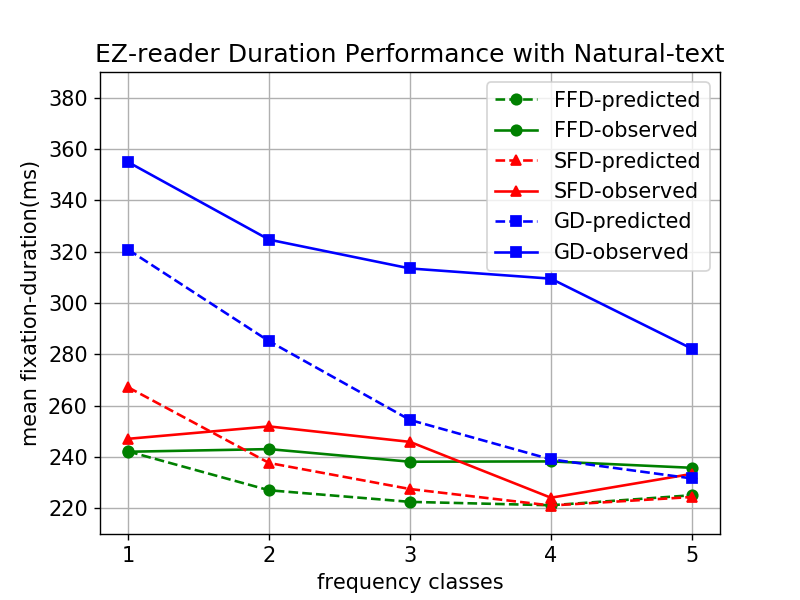

In [10]:

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib notebook

ax = plt.figure().gca()

freq_class = [1, 2, 3, 4, 5]

plt.figure(1)
plt.title('EZ-reader Duration Performance with Natural-text')

plt.plot(freq_class, prediction_FFD, linestyle="--", marker='o', color="g",  label="FFD-predicted")
plt.plot(freq_class, observed_FFD, linestyle="-", marker='o', color="g", label="FFD-observed")

plt.plot(freq_class, prediction_SFD, linestyle="--", marker='^', color="r", label="SFD-predicted")
plt.plot(freq_class, observed_SFD, linestyle="-", marker='^', color="r", label="SFD-observed")

plt.plot(freq_class, prediction_GD, linestyle="--", marker='s', color="b", label="GD-predicted")
plt.plot(freq_class, observed_GD, linestyle="-", marker='s', color="b", label="GD-observed")

plt.xlabel("frequency classes")
plt.ylabel("mean fixation-duration(ms)")


ax.xaxis.set_major_locator(MaxNLocator(integer=True))


#plt.style.use('fivethirtyeight')
plt.ylim([210,390])
#plt.xlim([0,6])
plt.legend()
plt.rcParams.update({'font.size': 12})
plt.grid(True)

plt.show()


In [9]:
plt.savefig("EZ-duration-NT.png")

In [12]:
#RMSE

#mean_observed = np.mean(observed_FFD)

#G= (ytest[i] – preds[i]) **2
#Y=np.mean(ytest)
#R2=1 - (g / y)

def my_R2(observed, predicted):
    #my r2 from scratch
    
    G =np.subtract(observed,predicted) **2
    y = np.mean(observed)

    r2 = 1 - (G/y)
    return np.mean(r2)


def my_RMSE(observed, predicted):
    #my r2 from scratch
    
    G =np.subtract(observed,predicted) **2
    y = np.mean(observed)

    rmse = (G/np.subtract(observed, y)) **2
    return np.mean(rmse)


# print('R2 FFD:', my_R2(observed_FFD,prediction_FFD))
# print('R2 SFD:', my_R2(observed_SFD,prediction_SFD))
# print('R2 GD:', my_R2(observed_GD,prediction_GD))

#print()
#print('RMSE FFD:', my_RMSE(observed_FFD,prediction_FFD))
#print('RMSE SFD:', my_RMSE(observed_SFD,prediction_SFD))
#print('RMSE GD:', my_RMSE(observed_GD,prediction_GD))
# print('Mean error FFD:', np.subtract(observed_FFD,prediction_FFD).mean())
# print('Mean error SFD:', np.subtract(observed_SFD,prediction_SFD).mean())
# print('Mean error GD:', np.subtract(observed_GD,prediction_GD).mean())


In [13]:
#mean error
#prediction_FFD - observed_FFD

# print('Mean error FFD:', np.subtract(observed_FFD,prediction_FFD).mean())
# print('Mean error SFD:', np.subtract(observed_SFD,prediction_SFD).mean())
# print('Mean error GD:', np.subtract(observed_GD,prediction_GD).mean())

In [14]:
#mean square error is not important because it accounts for the distance between the two lines which can be fixed 
#by playing with the parameters of the EZ-reader model. For now, let's keep the model the same.

# from sklearn.metrics import r2_score

# print("R2 FFD:", r2_score(observed_FFD,prediction_FFD))
# print("R2 SFD:", r2_score(observed_SFD,prediction_SFD))
# print("R2 GD:", r2_score(observed_GD,prediction_GD))


In [15]:
import scipy

FFD_slope, FFD_intercept, FFD_r_value, FFD_p_value, FFD_std_err = scipy.stats.linregress(observed_FFD, prediction_FFD)
SFD_slope, SFD_intercept, SFD_r_value, SFD_p_value, SFD_std_err = scipy.stats.linregress(observed_SFD, prediction_SFD)
GD_slope, GD_intercept, GD_r_value, GD_p_value, GD_std_err = scipy.stats.linregress(observed_GD, prediction_GD)

print('R2 FFD:', FFD_r_value, 'std-error:', FFD_std_err)
print('R2 SFD:', SFD_r_value, 'std-error:', SFD_std_err)
print('R2 GD:', GD_r_value, 'std-error:', GD_std_err)

AttributeError: module 'scipy' has no attribute 'stats'

In [16]:
#now let's work on probability
#file style: SFD 225.0 FFD 266.67 GD 343.0 TT 484.83 PrF 1.0 Pr1 0.5 Pr2 0.5 PrS 0.0 invention freq 5 pred 0.0 leng 9

#PrF

prediction_PrF = freq_based_analysis('NT-merged-EZ-output.txt', 9)
print(prediction_PrF)

observed_PrF = freq_based_analysis('NT-EZ-style-output.txt', 9)
print(observed_PrF)

[0.9662121212121212, 0.9418518518518518, 0.9013043478260868, 0.78075, 0.6814285714285713]
[0.9647727272727273, 0.9100000000000001, 0.741904761904762, 0.7262857142857143, 0.6039024390243903]


In [17]:
#Pr1

prediction_Pr1 = freq_based_analysis('NT-merged-EZ-output.txt', 11)
print(prediction_Pr1)

observed_Pr1 = freq_based_analysis('NT-EZ-style-output.txt', 11)
print(observed_Pr1)

[0.6792424242424242, 0.7062962962962963, 0.7730434782608696, 0.70225, 0.6551020408163264]
[0.3463636363636363, 0.3961904761904762, 0.2985714285714286, 0.3897142857142857, 0.3904878048780488]


In [18]:
#Pr2

prediction_Pr2 = freq_based_analysis('NT-merged-EZ-output.txt', 13)
print(prediction_Pr2)

observed_Pr2 = freq_based_analysis('NT-EZ-style-output.txt', 13)
print(observed_Pr2)

[0.28712121212121205, 0.23666666666666666, 0.12739130434782608, 0.07949999999999999, 0.026734693877551022]
[0.6190909090909092, 0.5152380952380953, 0.44476190476190486, 0.33742857142857147, 0.21317073170731707]


In [19]:
#PrS

prediction_PrS = freq_based_analysis('NT-merged-EZ-output.txt', 15)
print(prediction_PrS)

observed_PrS = freq_based_analysis('NT-EZ-style-output.txt', 15)
print(observed_PrS)

[0.035, 0.05925925925925926, 0.10130434782608692, 0.21999999999999997, 0.319795918367347]
[0.03522727272727273, 0.09000000000000001, 0.2580952380952381, 0.27371428571428574, 0.3960975609756097]


<IPython.core.display.Javascript object>


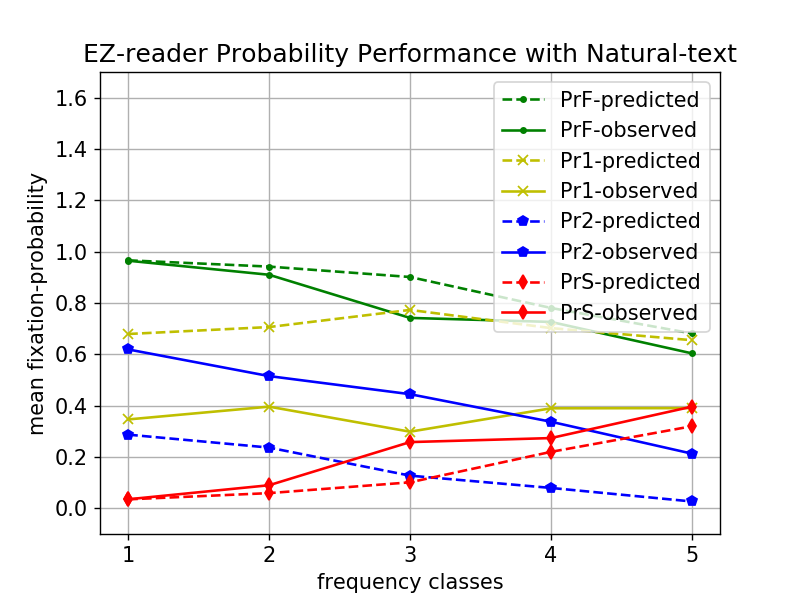

In [20]:

ax = plt.figure().gca()

plt.figure(2)
plt.title('EZ-reader Probability Performance with Natural-text')
#PrF  Pr1  Pr2  PrS
plt.plot(freq_class, prediction_PrF, linestyle="--", marker='.', color="g",  label="PrF-predicted")
plt.plot(freq_class, observed_PrF, linestyle="-", marker='.', color="g", label="PrF-observed")

plt.plot(freq_class, prediction_Pr1, linestyle="--", marker='x', color="y", label="Pr1-predicted")
plt.plot(freq_class, observed_Pr1, linestyle="-", marker='x', color="y", label="Pr1-observed")

plt.plot(freq_class, prediction_Pr2, linestyle="--", marker='p', color="b", label="Pr2-predicted")
plt.plot(freq_class, observed_Pr2, linestyle="-", marker='p', color="b", label="Pr2-observed")

plt.plot(freq_class, prediction_PrS, linestyle="--", marker='d', color="r", label="PrS-predicted")
plt.plot(freq_class, observed_PrS, linestyle="-", marker='d', color="r", label="PrS-observed")

plt.xlabel("frequency classes")
plt.ylabel("mean fixation-probability")




ax.xaxis.set_major_locator(MaxNLocator(integer=True))




plt.ylim([-0.1,1.7])
#plt.xlim([0,6])
plt.legend(loc='upper right')
plt.rcParams.update({'font.size': 12})
plt.grid(True)
plt.show()

In [30]:
plt.savefig("EZ-prob-NT.png")

In [21]:
#probability validation

import scipy

PrF_slope, PrF_intercept, PrF_r_value, PrF_p_value, PrF_std_err = scipy.stats.linregress(observed_PrF, prediction_PrF)
Pr1_slope, Pr1_intercept, Pr1_r_value, Pr1_p_value, Pr1_std_err = scipy.stats.linregress(observed_Pr1, prediction_Pr1)
Pr2_slope, Pr2_intercept, Pr2_r_value, Pr2_p_value, Pr2_std_err = scipy.stats.linregress(observed_Pr2, prediction_Pr2)
PrS_slope, PrS_intercept, PrS_r_value, PrS_p_value, PrS_std_err = scipy.stats.linregress(observed_PrS, prediction_PrS)

print('R2 PrF:', PrF_r_value, 'std-error:', PrF_std_err)
print('R2 Pr1:', Pr1_r_value, 'std-error:', Pr1_std_err)
print('R2 Pr2:', Pr2_r_value, 'std-error:', Pr2_std_err)
print('R2 PrS:', PrS_r_value, 'std-error:', PrS_std_err)

AttributeError: module 'scipy' has no attribute 'stats'

In [589]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr


# calculate Pearson's correlation
corr, _ = pearsonr(observed_FFD,prediction_FFD)
print('Pearsons correlation FFD: %.3f' % corr)

corr, _ = pearsonr(observed_SFD,prediction_SFD)
print('Pearsons correlation SFD: %.3f' % corr)

corr, _ = pearsonr(observed_GD,prediction_GD)
print('Pearsons correlation GD: %.3f' % corr)

#probability stuff
#PrF  Pr1  Pr2  PrS
corr, _ = pearsonr(observed_PrF,prediction_PrF)
print('Pearsons correlation PrF: %.3f' % corr)

corr, _ = pearsonr(observed_Pr1,prediction_Pr1)
print('Pearsons correlation Pr1: %.3f' % corr)

corr, _ = pearsonr(observed_Pr2,prediction_Pr2)
print('Pearsons correlation Pr2: %.3f' % corr)

corr, _ = pearsonr(observed_PrS,prediction_PrS)
print('Pearsons correlation PrS: %.3f' % corr)

Pearsons correlation FFD: 0.579
Pearsons correlation SFD: 0.591
Pearsons correlation GD: 0.945
Pearsons correlation PrF: 0.918
Pearsons correlation Pr1: -0.725
Pearsons correlation Pr2: 0.973
Pearsons correlation PrS: 0.920
